In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = input_data.read_data_sets('data/',one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(dtype=tf.float32,shape=[None,784],name = "input_data")
y = tf.placeholder(dtype=tf.float32,shape=[None,10],name = "label_data")

In [4]:
para = {
    "filter1":tf.Variable(initial_value=tf.random_normal([3,3,1,64],mean = 0.0,stddev=0.1),name = "filter1"),
    "bias1":tf.Variable(initial_value=tf.zeros([64]),name = "bias1"),
    "filter2":tf.Variable(initial_value=tf.random_normal([3,3,64,128],mean = 0.0,stddev=0.1),name = "filter2"),
    "bias2":tf.Variable(initial_value=tf.zeros([128]),name = "bias2"),
    "W1":tf.Variable(initial_value=tf.random_normal([7*7*128,256],mean= 0.0,stddev=0.1),name = "W1"),
    "B1":tf.Variable(initial_value=tf.zeros([256]),name= "B1"),
    "W2":tf.Variable(initial_value=tf.random_normal([256,128],mean=0.0,stddev=0.1),name = "W2"),
    "B2":tf.Variable(initial_value=tf.zeros([128]),name = "B2"),
    "W3":tf.Variable(initial_value=tf.random_normal([128,10],mean=0.0,stddev=0.1),name="W3"),
    "B3":tf.Variable(initial_value=tf.zeros([10]),name = "B3")
}

In [5]:
n_input = tf.reshape(x,[-1,28,28,1])
con_1 = tf.nn.conv2d(n_input,para["filter1"],strides=[1,1,1,1],padding="SAME")
con_1_out = tf.nn.relu(tf.nn.bias_add(con_1,para["bias1"]))
con_1_pool = tf.nn.max_pool(con_1_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
con_2 = tf.nn.conv2d(con_1_pool,para["filter2"],strides=[1,1,1,1],padding="SAME")
con_2_out = tf.nn.relu(tf.nn.bias_add(con_2,para["bias2"]))
con_2_pool = tf.nn.max_pool(con_2_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
con_out = tf.reshape(con_2_pool,[-1,7*7*128])
lay_1_out =tf.nn.sigmoid(tf.matmul(con_out,para["W1"])+para["B1"])
lay_2_out = tf.nn.sigmoid(tf.matmul(lay_1_out,para["W2"])+para["B2"])
pred = tf.nn.softmax(tf.matmul(lay_2_out,para["W3"])+para["B3"])

In [6]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
opti = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
equal = tf.equal(tf.arg_max(y,1),tf.arg_max(pred,1))
accuracy = tf.reduce_mean(tf.cast(equal,dtype=tf.float32))

Instructions for updating:
Use `argmax` instead


In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=3)
batch_size = 25
epochs = 10
num_inter = data.train.num_examples//batch_size
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
config=tf.ConfigProto(log_device_placement=True,allow_soft_placement=True,gpu_options=gpu_options)
with tf.Session(config = config) as sess:
    sess.run(init)
    for epoch in range(epochs):
        for inter in range(num_inter):
            train_x,train_y = data.train.next_batch(batch_size)
            _,loss,accu = sess.run([opti,cost,accuracy],feed_dict = {x:train_x,y:train_y})
            if inter % 200 == 0 and inter != 0:
                print("inter:{0} loss:{1} accu:{2}".format(inter+epoch*num_inter,loss,accu))
                saver.save(sess,"mnist_save/mnist.ckpt-",global_step = inter+epoch*num_inter)
        test_accuracy = sess.run(accuracy,feed_dict={x:data.test.images[0:500],y:data.test.labels[0:500]})
        print("test_accuracy:{}".format(test_accuracy))

inter:200 loss:2.305156946182251 accu:0.03999999910593033
inter:400 loss:2.2072646617889404 accu:0.36000001430511475
inter:600 loss:1.9711154699325562 accu:0.5600000023841858
inter:800 loss:1.826384425163269 accu:0.6800000071525574
inter:1000 loss:1.91221022605896 accu:0.5600000023841858
inter:1200 loss:1.9339816570281982 accu:0.5199999809265137
inter:1400 loss:1.861399531364441 accu:0.6399999856948853
inter:1600 loss:1.71478271484375 accu:0.800000011920929
inter:1800 loss:1.7845284938812256 accu:0.7599999904632568
inter:2000 loss:1.6840990781784058 accu:0.800000011920929
test_accuracy:0.7519999742507935
inter:2400 loss:1.779840350151062 accu:0.6800000071525574
inter:2600 loss:1.6050862073898315 accu:0.8799999952316284
inter:2800 loss:1.7172430753707886 accu:0.7599999904632568
inter:3000 loss:1.658205509185791 accu:0.8399999737739563
inter:3200 loss:1.6796863079071045 accu:0.800000011920929
inter:3400 loss:1.7802870273590088 accu:0.7200000286102295
inter:3600 loss:1.7116918563842773 ac

INFO:tensorflow:Restoring parameters from mnist_save/mnist.ckpt--21600


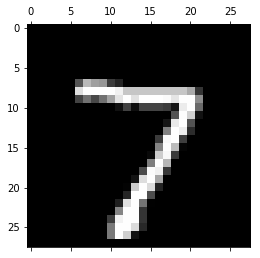

True:[7],predict:[7]


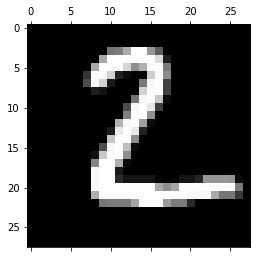

True:[2],predict:[2]


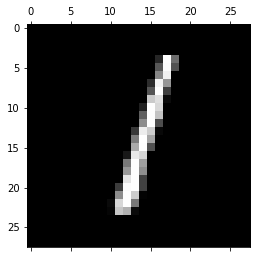

True:[1],predict:[1]


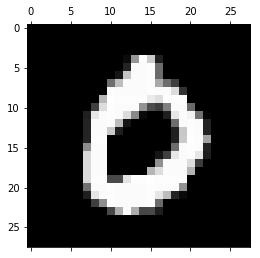

True:[0],predict:[0]


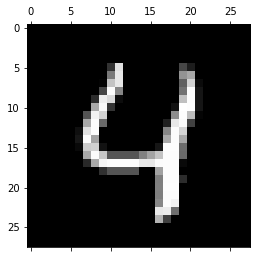

True:[4],predict:[4]


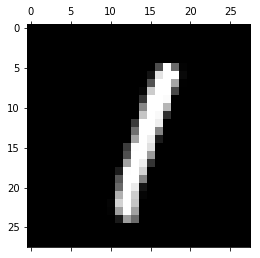

True:[1],predict:[1]


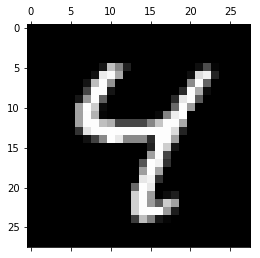

True:[4],predict:[4]


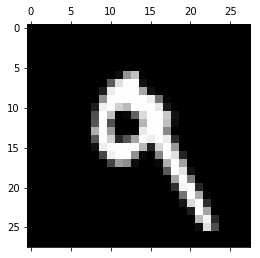

True:[9],predict:[9]


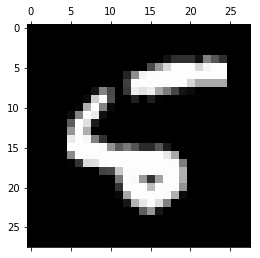

True:[5],predict:[5]


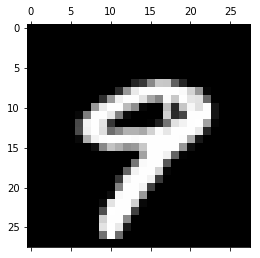

True:[9],predict:[9]


In [13]:
with tf.Session() as sess_new:
    sess_new.run(init)
    saver.restore(sess_new,"mnist_save/mnist.ckpt--21600")
    for i in range(10):
        image = data.test.images[i]
        label = data.test.labels[i]
        label = np.reshape(label,[1,10])
        image_show = np.reshape(image,[28,28])
        plt.matshow(image_show,cmap = plt.get_cmap("gray"))
        plt.show()
        image_test = np.reshape(image,[1,784])
        predict = sess_new.run(pred,feed_dict = {x:image_test})
        P = tf.arg_max(predict,1)
        L = tf.arg_max(label,1)
        print("True:{0},predict:{1}".format(L.eval(),P.eval()))